In [56]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import glob
from scipy import stats
pd.set_option('display.max_columns',100)

In [57]:
#Check data that exists in Data folder
import os
FOLDER = 'Data/'
file_list = sorted(os.listdir(FOLDER))
file_list

['.ipynb_checkpoints',
 'Data',
 'combined_tmdb_data.csv.gz',
 'final_tmdb_data_2000.csv.gz',
 'final_tmdb_data_2001.csv.gz',
 'final_tmdb_data_2010.csv.gz',
 'final_tmdb_data_2011.csv.gz',
 'final_tmdb_data_2012.csv.gz',
 'final_tmdb_data_2013.csv.gz',
 'final_tmdb_data_2014.csv.gz',
 'final_tmdb_data_2015.csv.gz',
 'final_tmdb_data_2016.csv.gz',
 'final_tmdb_data_2017.csv.gz',
 'final_tmdb_data_2018.csv.gz',
 'final_tmdb_data_2019.csv.gz',
 'title_akas.csv.gz',
 'title_basics.csv.gz',
 'title_ratings.csv.gz',
 'tmdb_api_results_2000.json',
 'tmdb_api_results_2001.json',
 'tmdb_api_results_2010.json',
 'tmdb_api_results_2011.json',
 'tmdb_api_results_2012.json',
 'tmdb_api_results_2013.json',
 'tmdb_api_results_2014.json',
 'tmdb_api_results_2015.json',
 'tmdb_api_results_2016.json',
 'tmdb_api_results_2017.json',
 'tmdb_api_results_2018.json',
 'tmdb_api_results_2019.json',
 'tmdb_results_combined.csv.gz']

In [58]:
#Use glob to find final_tmdb_data csv files
q = FOLDER+"final_*csv.gz"
print(q)
file_list = sorted(glob.glob(q))
file_list

Data/final_*csv.gz


['Data/final_tmdb_data_2000.csv.gz',
 'Data/final_tmdb_data_2001.csv.gz',
 'Data/final_tmdb_data_2010.csv.gz',
 'Data/final_tmdb_data_2011.csv.gz',
 'Data/final_tmdb_data_2012.csv.gz',
 'Data/final_tmdb_data_2013.csv.gz',
 'Data/final_tmdb_data_2014.csv.gz',
 'Data/final_tmdb_data_2015.csv.gz',
 'Data/final_tmdb_data_2016.csv.gz',
 'Data/final_tmdb_data_2017.csv.gz',
 'Data/final_tmdb_data_2018.csv.gz',
 'Data/final_tmdb_data_2019.csv.gz']

In [59]:
# Use list comprehension to load all files into 1 data frame
df = pd.concat([pd.read_csv(f, lineterminator = '\n') for f in file_list])
df.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,Two rural teens sing and dance their way throu...,2.075,/hfO64mXz3DgUxkBVU7no2UWRP7x.jpg,"[{'id': 51207, 'logo_path': None, 'name': 'Sul...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-09-22,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.500,22.0,NaN
2,tt0113092,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,Earth is in a state of constant war and two co...,0.704,/h9bWO13nWRGZJo4XVPiElXyrRMU.jpg,"[{'id': 7405, 'logo_path': '/rfnws0uY8rsNAsrLb...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-11-15,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,5.450,10.0,NaN
3,tt0116391,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,"After falling prey to underworld, four friends...",0.887,/yB5wRu4uyXXwZA3PEj8cITu0xt3.jpg,[],"[{'iso_3166_1': 'IN', 'name': 'India'}]",2000-04-14,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.0,4.000,1.0,NaN
4,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,843.0,cn,花樣年華,Two neighbors become intimate after discoverin...,26.988,/iYypPT4bhqXfq1b6EnmxvRt6b2Y.jpg,"[{'id': 539, 'logo_path': '/iPLtePguIzOPNtAWfT...","[{'iso_3166_1': 'FR', 'name': 'France'}, {'iso...",2000-09-29,14204632.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.111,2305.0,PG


In [60]:
# Remove zero id
df = df.loc[df['imdb_id'] != '0']
df.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
1,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,Two rural teens sing and dance their way throu...,2.075,/hfO64mXz3DgUxkBVU7no2UWRP7x.jpg,"[{'id': 51207, 'logo_path': None, 'name': 'Sul...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-09-22,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.500,22.0,NaN
2,tt0113092,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,Earth is in a state of constant war and two co...,0.704,/h9bWO13nWRGZJo4XVPiElXyrRMU.jpg,"[{'id': 7405, 'logo_path': '/rfnws0uY8rsNAsrLb...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-11-15,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,5.450,10.0,NaN
3,tt0116391,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,"After falling prey to underworld, four friends...",0.887,/yB5wRu4uyXXwZA3PEj8cITu0xt3.jpg,[],"[{'iso_3166_1': 'IN', 'name': 'India'}]",2000-04-14,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.0,4.000,1.0,NaN
4,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,843.0,cn,花樣年華,Two neighbors become intimate after discoverin...,26.988,/iYypPT4bhqXfq1b6EnmxvRt6b2Y.jpg,"[{'id': 539, 'logo_path': '/iPLtePguIzOPNtAWfT...","[{'iso_3166_1': 'FR', 'name': 'France'}, {'iso...",2000-09-29,14204632.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.111,2305.0,PG
5,tt0118852,0.0,/vceiGZ3uavAEHlTA7v0GjQsGVKe.jpg,NaN,0.0,"[{'id': 18, 'name': 'Drama'}]",NaN,49511.0,en,Chinese Coffee,"When Harry Levine, an aging, unsuccessful Gree...",2.984,/nZGWnSuf1FIuzyEuMRZHHZWViAp.jpg,"[{'id': 67930, 'logo_path': None, 'name': 'Cha...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-09-02,0.0,99.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,There's a fine line between friendship and bet...,Chinese Coffee,0.0,6.642,53.0,R


In [61]:
# Reset index
df = df.reset_index(drop = True)
df.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,Two rural teens sing and dance their way throu...,2.075,/hfO64mXz3DgUxkBVU7no2UWRP7x.jpg,"[{'id': 51207, 'logo_path': None, 'name': 'Sul...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-09-22,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.500,22.0,NaN
1,tt0113092,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,Earth is in a state of constant war and two co...,0.704,/h9bWO13nWRGZJo4XVPiElXyrRMU.jpg,"[{'id': 7405, 'logo_path': '/rfnws0uY8rsNAsrLb...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-11-15,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,5.450,10.0,NaN
2,tt0116391,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,"After falling prey to underworld, four friends...",0.887,/yB5wRu4uyXXwZA3PEj8cITu0xt3.jpg,[],"[{'iso_3166_1': 'IN', 'name': 'India'}]",2000-04-14,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.0,4.000,1.0,NaN
3,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,843.0,cn,花樣年華,Two neighbors become intimate after discoverin...,26.988,/iYypPT4bhqXfq1b6EnmxvRt6b2Y.jpg,"[{'id': 539, 'logo_path': '/iPLtePguIzOPNtAWfT...","[{'iso_3166_1': 'FR', 'name': 'France'}, {'iso...",2000-09-29,14204632.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.111,2305.0,PG
4,tt0118852,0.0,/vceiGZ3uavAEHlTA7v0GjQsGVKe.jpg,NaN,0.0,"[{'id': 18, 'name': 'Drama'}]",NaN,49511.0,en,Chinese Coffee,"When Harry Levine, an aging, unsuccessful Gree...",2.984,/nZGWnSuf1FIuzyEuMRZHHZWViAp.jpg,"[{'id': 67930, 'logo_path': None, 'name': 'Cha...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-09-02,0.0,99.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,There's a fine line between friendship and bet...,Chinese Coffee,0.0,6.642,53.0,R


In [62]:
# Save data
df.to_csv(FOLDER+'combined_tmdb_data.csv.gz', compression = 'gzip', index = False)

## Load Data

In [63]:
df = pd.read_csv(FOLDER+'combined_tmdb_data.csv.gz',lineterminator='\n')
df.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,Two rural teens sing and dance their way throu...,2.075,/hfO64mXz3DgUxkBVU7no2UWRP7x.jpg,"[{'id': 51207, 'logo_path': None, 'name': 'Sul...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-09-22,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.500,22.0,NaN
1,tt0113092,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,Earth is in a state of constant war and two co...,0.704,/h9bWO13nWRGZJo4XVPiElXyrRMU.jpg,"[{'id': 7405, 'logo_path': '/rfnws0uY8rsNAsrLb...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-11-15,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,5.450,10.0,NaN
2,tt0116391,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,"After falling prey to underworld, four friends...",0.887,/yB5wRu4uyXXwZA3PEj8cITu0xt3.jpg,[],"[{'iso_3166_1': 'IN', 'name': 'India'}]",2000-04-14,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.0,4.000,1.0,NaN
3,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,843.0,cn,花樣年華,Two neighbors become intimate after discoverin...,26.988,/iYypPT4bhqXfq1b6EnmxvRt6b2Y.jpg,"[{'id': 539, 'logo_path': '/iPLtePguIzOPNtAWfT...","[{'iso_3166_1': 'FR', 'name': 'France'}, {'iso...",2000-09-29,14204632.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.111,2305.0,PG
4,tt0118852,0.0,/vceiGZ3uavAEHlTA7v0GjQsGVKe.jpg,NaN,0.0,"[{'id': 18, 'name': 'Drama'}]",NaN,49511.0,en,Chinese Coffee,"When Harry Levine, an aging, unsuccessful Gree...",2.984,/nZGWnSuf1FIuzyEuMRZHHZWViAp.jpg,"[{'id': 67930, 'logo_path': None, 'name': 'Cha...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-09-02,0.0,99.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,There's a fine line between friendship and bet...,Chinese Coffee,0.0,6.642,53.0,R


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2616 entries, 0 to 2615
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                2616 non-null   object 
 1   adult                  2606 non-null   float64
 2   backdrop_path          1447 non-null   object 
 3   belongs_to_collection  211 non-null    object 
 4   budget                 2606 non-null   float64
 5   genres                 2606 non-null   object 
 6   homepage               170 non-null    object 
 7   id                     2606 non-null   float64
 8   original_language      2606 non-null   object 
 9   original_title         2606 non-null   object 
 10  overview               2562 non-null   object 
 11  popularity             2606 non-null   float64
 12  poster_path            2365 non-null   object 
 13  production_companies   2606 non-null   object 
 14  production_countries   2606 non-null   object 
 15  rele

In [65]:
# Drop unnecessary columns for hypothesis tests
drop_cols = ['adult', 'backdrop_path', 'belongs_to_collection', 'homepage', 
             'original_title', 'overview', 'poster_path', 'status', 'tagline', 
             'video', 'budget', 'genres', 'id', 'original_language', 
             'popularity', 'production_companies', 'production_countries', 
             'spoken_languages', 'title',]
df = df.drop(columns = drop_cols)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2616 entries, 0 to 2615
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   imdb_id        2616 non-null   object 
 1   release_date   2585 non-null   object 
 2   revenue        2606 non-null   float64
 3   runtime        2606 non-null   float64
 4   vote_average   2606 non-null   float64
 5   vote_count     2606 non-null   float64
 6   certification  817 non-null    object 
dtypes: float64(4), object(3)
memory usage: 143.2+ KB


In [67]:
# Preview certification column values
df['certification'].value_counts(dropna = False)

NaN        1799
R           466
PG-13       182
NR           76
PG           62
G            24
NC-17         6
Unrated       1
Name: certification, dtype: int64

In [68]:
## removing NC-17
df = df.loc[ df['certification']!='NC-17']

In [69]:
# Remove extra space
df['certification'] = df['certification'].str.strip()

In [70]:
# Clean up extra ratings
cert_dict = {'Unrated': 'NR',
            'UR': 'NR',
            'Not Rated': 'NR',
            'ScreamFest Horror Film Festival': 'NR'}

# Replace values
df['certification'] = df['certification'].replace(cert_dict)
df['certification'].value_counts(dropna = False)


NaN      1799
R         466
PG-13     182
NR         77
PG         62
G          24
Name: certification, dtype: int64

In [71]:
# Drop nan values
df = df.dropna(subset = 'certification')
df['certification'].value_counts()

R        466
PG-13    182
NR        77
PG        62
G         24
Name: certification, dtype: int64

## Hypothesis Testing 1

### Does the MPAA rating of a movie (G/PG/PG-13/R) affect how much revenue the movie generates?

#### State the Hypotheses:

- **Null Hypotheses**: There is no difference between revenue generated for different ratings.
- **Alternative Hypotheses**: There is a significant difference between revenue generated for different ratings.
- **Alpha**: 0.05

#### Select Test:

- We will be using the ANOVA test because we are dealing with multiple data groups

#### Test Assumptions:

-No significant outliers

-Normality

-Equal Variance

In [72]:
## Create groups dictionary
groups = {}
#Loop through all unique categories
for i in df['certification'].unique():
    ## Get series for group and rename
    data = df.loc[df['certification']==i,'revenue'].copy()
    
    # save into the dictionary
    groups[i] = data
groups.keys()


dict_keys(['PG', 'R', 'G', 'NR', 'PG-13'])

In [73]:
df['certification'].value_counts()

R        466
PG-13    182
NR        77
PG        62
G         24
Name: certification, dtype: int64

In [74]:
# Running normal test on each group and confirming there are >20 in each group
norm_results = {}
for i, data in groups.items():
    stat, p = stats.normaltest(data)
    ## save the p val, test statistic, and the size of the group
    norm_results[i] = {'n': len(data),
                             'p':p,
                             'test stat':stat,}
# convert to a dataframe
norm_results_df = pd.DataFrame(norm_results).T

#Checking sig with pandas 
norm_results_df['sig'] = norm_results_df['p'] < .05 
norm_results_df

,n,p,test stat,sig
PG,62.0,1.207790e-19,87.120650,True
R,466.0,1.182243e-96,441.761511,True
G,24.0,1.060741e-08,36.723426,True
NR,77.0,1.484109e-33,151.180987,True
PG-13,182.0,1.320001e-30,137.599841,True


- Our data is not normally distributed, however, because there are more than 15 samples in each group, we can continue

In [75]:
#Test for equal variance
stats.levene(*groups.values())

LeveneResult(statistic=21.60819565998911, pvalue=5.935865004821628e-17)

- Our Levene's test provides evidence that there is a significant difference between revenue generated for different ratings. This means we would reject our null hypothesis.

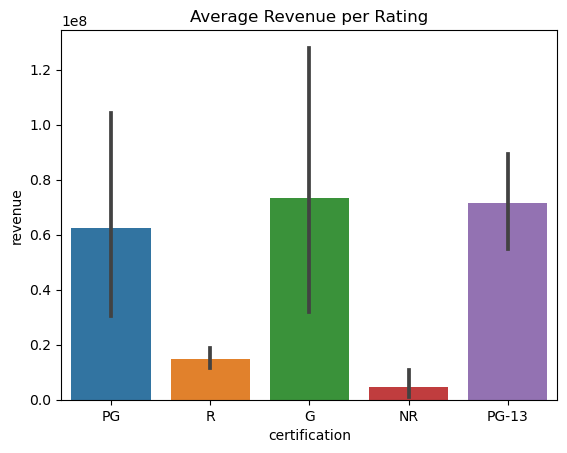

In [76]:
# Create barplot of revenue vs. rating
ax = sns.barplot(data = df, x= 'certification', y= 'revenue')
ax.set_title('Average Revenue per Rating');

## Hypothesis Testing 2

### Do movies that are over 2.5 hours long earn more revenue than movies that are 1.5 hours long (or less)?

#### State the Hypotheses:

**Null Hypotheses**: There is no difference between groups of movies.

**Alternative Hypotheses**: There is a significant difference between groups of movies.

**Alpha** = 0.05

#### Select Test:

- I will be using a 2 sample T-Test because my comparison is between 2 sample groups (revenue and runtime) 

#### Test Assumptions:

- No significant outliers
- Normality
- Equal Variance

In [77]:
# splitting movies between 150 mins and 90 mins long 
# Add columns for long and short movies
df['is_long'] = df['runtime'] > 150
df['is_short'] = df['runtime'] <= 90
df.head()

,imdb_id,release_date,revenue,runtime,vote_average,vote_count,certification,is_long,is_short
3,tt0118694,2000-09-29,14204632.0,99.0,8.111,2305.0,PG,False,False
4,tt0118852,2000-09-02,0.0,99.0,6.642,53.0,R,False,False
5,tt0119273,2000-04-19,0.0,88.0,6.077,189.0,R,False,True
6,tt0119495,2000-08-24,0.0,86.0,0.000,0.0,R,False,True
10,tt0120467,2002-04-26,14904.0,87.0,5.500,44.0,R,False,True


In [78]:
# Separate into two groups
long = df.loc[df['is_long'] == True, ['revenue', 'is_long']]
short = df.loc[df['is_short'] == True, ['revenue', 'is_short']]
print(f'There are {len(long)} movies over 2.5 hours.')
print(f'There are {len(short)} movies under 1.5 hours.')

There are 12 movies over 2.5 hours.
There are 232 movies under 1.5 hours.


In [79]:
# Create final groups
long_group = long['revenue']
short_group = short['revenue']
display(long_group.head(), short_group.head())

238     215294342.0
477             0.0
587       4900000.0
790      20908467.0
1265    871368364.0
Name: revenue, dtype: float64

5             0.0
6             0.0
10        14904.0
12    224834564.0
14            0.0
Name: revenue, dtype: float64

In [80]:
# Check for outliers in long group
zscores_long = stats.zscore(long_group)
outliers_long = abs(zscores_long)>3
np.sum(outliers_long)

0

In [81]:
# Check for outliers in short group
zscores_short = stats.zscore(short_group)
outliers_short = abs(zscores_short)>3
np.sum(outliers_short)

5

In [82]:
# Remove outliers
short_group = short_group[(np.abs(stats.zscore(short_group)) < 3)]

In [83]:
# Normal test: long group
result_long = stats.normaltest(long_group)
result_long

/opt/homebrew/Caskroom/miniforge/base/envs/dojo-env/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1772: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


NormaltestResult(statistic=6.867988815394849, pvalue=0.03225783215527952)

In [84]:
# Normal test: short group
result_short = stats.normaltest(short_group)
result_short

NormaltestResult(statistic=192.43115587510775, pvalue=1.637213920450299e-42)

- We do not have normally distributed data, however, we can proceed due to our high sample sizes.

In [85]:
# Test for equal variance
result = stats.levene(long_group, short_group)
result

LeveneResult(statistic=72.20963940977056, pvalue=2.1719942781533567e-15)

- Our Levene's test provides evidence that there is a significant difference between groups of movies. We'd be rejecting our null hypothesis.

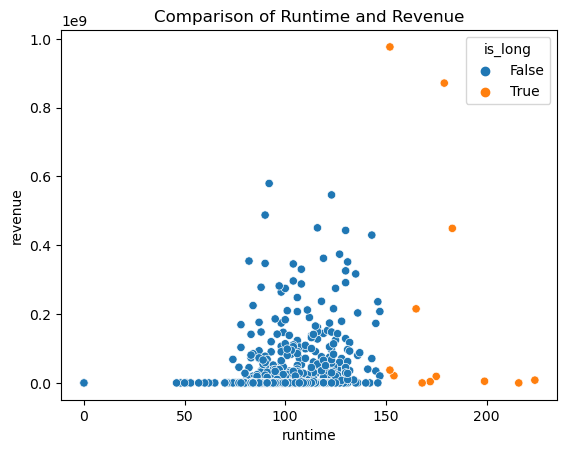

In [86]:
# Regression plot of revenue and runtime
ax = sns.scatterplot(data = df, x = 'runtime', y = 'revenue', hue= 'is_long')
ax.set_title('Comparison of Runtime and Revenue');

## Hypothesis Test 3

### Do movies with higher average votes generate more revenue than movies with lower average votes?

#### State Hypotheses::

**Null Hypotheses**: There is no difference in revenue between movies with large votes and movies with small votes.

**Alternative Hypotheses**: There is a significant difference between revenue generated between movies with large votes and movies with small votes.

**Alpha** = 0.05

#### Select Test:

- I will be using a 2 sample T-Test because my comparison is between 2 sample groups (revenue and average votes)

#### Test Assumption:

- No significant outliers
- Normality
- Equal Variance

In [88]:
# splitting movies with average votes > 5 and average votes < 5 
# Add columns for high and low average votes
df['high_votes'] = df['vote_average'] > 5
df.head()

,imdb_id,release_date,revenue,runtime,vote_average,vote_count,certification,is_long,is_short,high_votes
3,tt0118694,2000-09-29,14204632.0,99.0,8.111,2305.0,PG,False,False,True
4,tt0118852,2000-09-02,0.0,99.0,6.642,53.0,R,False,False,True
5,tt0119273,2000-04-19,0.0,88.0,6.077,189.0,R,False,True,True
6,tt0119495,2000-08-24,0.0,86.0,0.000,0.0,R,False,True,False
10,tt0120467,2002-04-26,14904.0,87.0,5.500,44.0,R,False,True,True


In [89]:
# Separate into two groups
high = df.loc[df['high_votes'] == True, ['revenue', 'high_votes']]
low = df.loc[df['high_votes'] == False, ['revenue', 'high_votes']]
print(f'There are {len(high)} movies with average votes over 5.')
print(f'There are {len(low)} movies with average votes under 5.')

There are 588 movies with average votes over 5.
There are 223 movies with average votes under 5.


In [90]:
# Create final groups
high_group = high['revenue']
low_group = low['revenue']
display(high_group.head(), low_group.head())

3      14204632.0
4             0.0
5             0.0
10        14904.0
12    224834564.0
Name: revenue, dtype: float64

6            0.0
20           0.0
23           0.0
27    35134820.0
34    14828081.0
Name: revenue, dtype: float64

In [91]:
# Check for outliers in high group
zscores_high = stats.zscore(high_group)
outliers_high = abs(zscores_high)>3
np.sum(outliers_high)

15

In [92]:
# Remove outliers
high_group = high_group[(np.abs(stats.zscore(high_group)) < 3)]

In [93]:
# Check for outliers in low group
zscores_low = stats.zscore(low_group)
outliers_low = abs(zscores_low)>3
np.sum(outliers_low)

5

In [95]:
# Remove outliers
low_group = low_group[(np.abs(stats.zscore(low_group)) < 3)]

In [96]:
#Normal test: high group
result_high = stats.normaltest(high_group)
result_high

NormaltestResult(statistic=322.1907773651942, pvalue=1.0893354451784762e-70)

In [97]:
#Normal test: low group
result_low = stats.normaltest(low_group)
result_low

NormaltestResult(statistic=278.35879389637216, pvalue=3.59050809975516e-61)

- We do not have normally distributed data, however, we can continue as usual because our groups are large enough.

In [98]:
# Test for equal variance
result = stats.levene(high_group, low_group)
result

LeveneResult(statistic=54.96338367726918, pvalue=3.199520697583657e-13)

- Our Levene's test provides evidence that there is a significant difference between revenue generated between movies with large votes and movies with small votes. We'd be rejecting our null hypothesis.

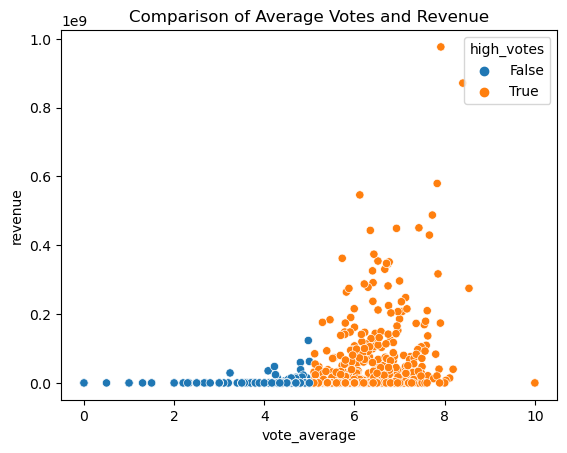

In [99]:
# Scatterplot of average votes
ax = sns.scatterplot(data= df, x= 'vote_average', y= 'revenue', hue= 'high_votes')
ax.set_title('Comparison of Average Votes and Revenue');